REF: https://colab.research.google.com/drive/14oFkV55gAGCjfgAbWqM4pWnroibcuo_Y?usp=sharing#scrollTo=IlT5RZ2KxQ5h

In [76]:
##############################
# --- Importing Packages --- #
##############################

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.optimize import minimize


### **2. Gradient Descent**

Gradient descent is a simple algorithm to find the minimum value of a function. It works by iteratively "moving downhill" on the function's surface until you reach the lowest point.

At each step, the algorithm:

- Calculates the slope (gradient) of the function at the current position.
- Updates the position by moving in the opposite direction of the slope ($ - \nabla f(x) $ ) hence "descent".

This process ensures that the function value decreases at every step.

#### **How it Works**

We repeatedly update our position using the formula:

\begin{equation}
x^{(k+1)} = x^{(k)} +  \alpha^{(k)} \Delta x^{(k)}
\end{equation}

Where:
- $k$ denotes the iteration, i.e., number of steps the algorithm has taken so far. 
- $x^{(k)}$ is the position at $k$.
- $\Delta x^{(k)}$ is the gradient (slope) of the function at $x^{(k)}$.
- $\alpha$ is the step size, i.e., how far to move in the "downhill" direction.

Given a starting point $x \in X$.

Repeat the following until a stopping criterion is met.:
1. $~~~~~~$ $ \Delta x := - \nabla f(x) $
2. $~~~~~~$ Choose $\alpha$.
3. $~~~~~~$ Update: $ x \leftarrow x +  \alpha \Delta x$

N.B. These methods are called descent methods, because at each iteration $f \left(x^{(k+1)} \right) \leq  f \left(x^{(k)} \right)$.


In [113]:
############################
# --- Gradient Descent --- #
############################

def gradient_descent(f, x0, grad_f, alpha, max_iter=1e5, grad_tol=1e-4, traj=False):
    '''
    Gradient Descent
    INPUTS:
        f        : Function to minimise
        x0       : Initial guess
        grad_f   : Gradient function
        alpha    : Step size / Learning rate
        max_iter : Maximum number of iterations
        grad_tol : Tolerance for gradient approximation
        plot     : Boolean for plotting
    OUTPUTS:
        x        : Optimal point
        iter_i   : Number of iterations needed
    '''

    # Initialise problem: iterations = 0, x = x0, etc.
    x      = np.copy(x0)
    iter_i = 0
    grad_i = grad_tol*10

    # Setting up lists to store x and objective value for plotting
    if traj == True:
        x_list = []
        f_list = []

    # optimisation loop
    while np.sum(np.abs(grad_i)) > grad_tol and iter_i < max_iter:

        # ============= Start of your code ============= #
        grad_i  = grad_f(f,x)            # compute gradient
        x       = x - alpha*grad_i       # compute step
        # ============= End of your code ============== #
        iter_i += 1

        # Saving data from this iteration to our lists
        if traj == True:
            x_list.append(x.flatten().tolist())
            f_list.append(f(x))

    # print('Optimisation using Gradient Descent \n')
    # print('Iterations: ', iter_i)
    # print('Optimal x : ', x)
    # print('Final grad: ', grad_i)

    # If we wish to get full optimisation trajcetory, return this
    if traj == True:
        return x, x_list, f_list,

    # Else, simply return the value of x and the iteration number
    return x, iter_i

#### **Method to Approximate Gradient**

One way to approximate the gradient of a function  is via the **finite differences method**. There exist three main types of finite difference approximations:

* Backward difference  $f'(x) \approx \frac{f(x_k) - f(x_k - \epsilon)}{\epsilon}$
* Forward difference  $f'(x) \approx \frac{f(x_k + \epsilon) + f(x_k)}{\epsilon}$
* Central difference $f'(x) \approx \frac{f(x_k + \frac{\epsilon}{2}) - f(x_k - \frac{\epsilon}{2})}{\epsilon}$

However, the central difference approximation gives the most accurate one among these three.

In [3]:
######################################
# --- Central finite differences --- #
######################################

def central_finite_diff5(f, x):
      '''
      Five-points method for central finite differences.
      INPUTS:
          f  : Function
          x  : Position where to approximate the gradient
      OUTPUTS:
          grad: Approximation of the gradient of f at x
      '''
      dim = x.shape[1]
      # Step-size is taken as the square root of the machine precision
      eps  = np.sqrt(np.finfo(float).eps)
      grad = np.zeros((1,dim))

      for i in range(dim):
          e           = np.zeros((1,dim))
          e[0,i]      = eps
          grad_approx = (f(x - 2*e) - 8*f(x - e) + 8*f(x + e) - f(x + 2*e) )/(12*eps)
          grad[0,i]   = grad_approx

      return grad

#### **Mathematical Functions to Minimise**

In [57]:
def rosenbrock_f(x):
    n = np.shape(x)[1]
    z = np.sum(100*(x[:,1:] - x[:,:n-1]**2)**2 + (x[:,:n-1] - 1)**2, axis=1)
    return z

In [156]:
def quadratic_f(x):
    return np.sum(x**2, axis=1)

In [168]:
# --- Gradient Descent --- #
# Initial guess
x0 = np.array([5.0, 5.0]).reshape(1, -1)

xf, x_list, f_list = gradient_descent(quadratic_f, x0, central_finite_diff5, 0.1, max_iter=100,  traj=True)

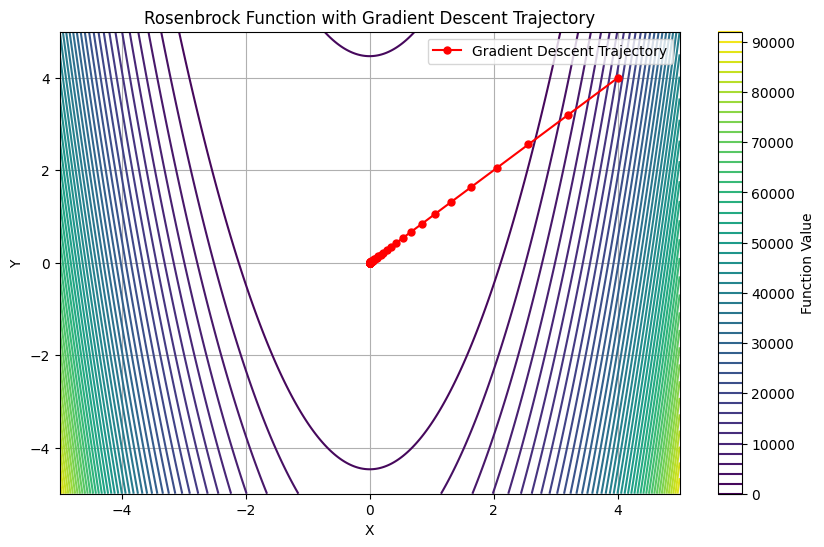

In [170]:
# Generate a grid for the contour plot
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
x_list = np.array(x_list)
# Flatten the grid and compute the function values
grid_points = np.stack([X.ravel(), Y.ravel()], axis=1)
Z = rosenbrock_f(grid_points).reshape(X.shape)

# Plot the contour and the trajectory
plt.figure(figsize=(10, 6))
contour = plt.contour(X, Y, Z, levels=50, cmap="viridis")
plt.colorbar(contour, label="Function Value")
plt.plot(x_list[:, 0], x_list[:, 1], 'r-o', label='Gradient Descent Trajectory', markersize=5)
plt.title("Rosenbrock Function with Gradient Descent Trajectory")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

#### **Why Gradient Descent isn't Always the Answer**


<video width="520" height="400" controls>
  <source src="gd_vis.mov" type="video/mp4">
</video>

Reference: https://github.com/JacobBumgarner/grad-descent-visualizer

In [171]:
# Multimodal Functions
def rastrigin_f(x, A=10):
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def ackley_f(x, a=20, b=0.2, c=2*np.pi):
    n = len(x)
    sum_sq_term = -a * np.exp(-b * np.sqrt(np.sum(x**2) / n))
    cos_term = -np.exp(np.sum(np.cos(c * x)) / n)
    return sum_sq_term + cos_term + a + np.exp(1)

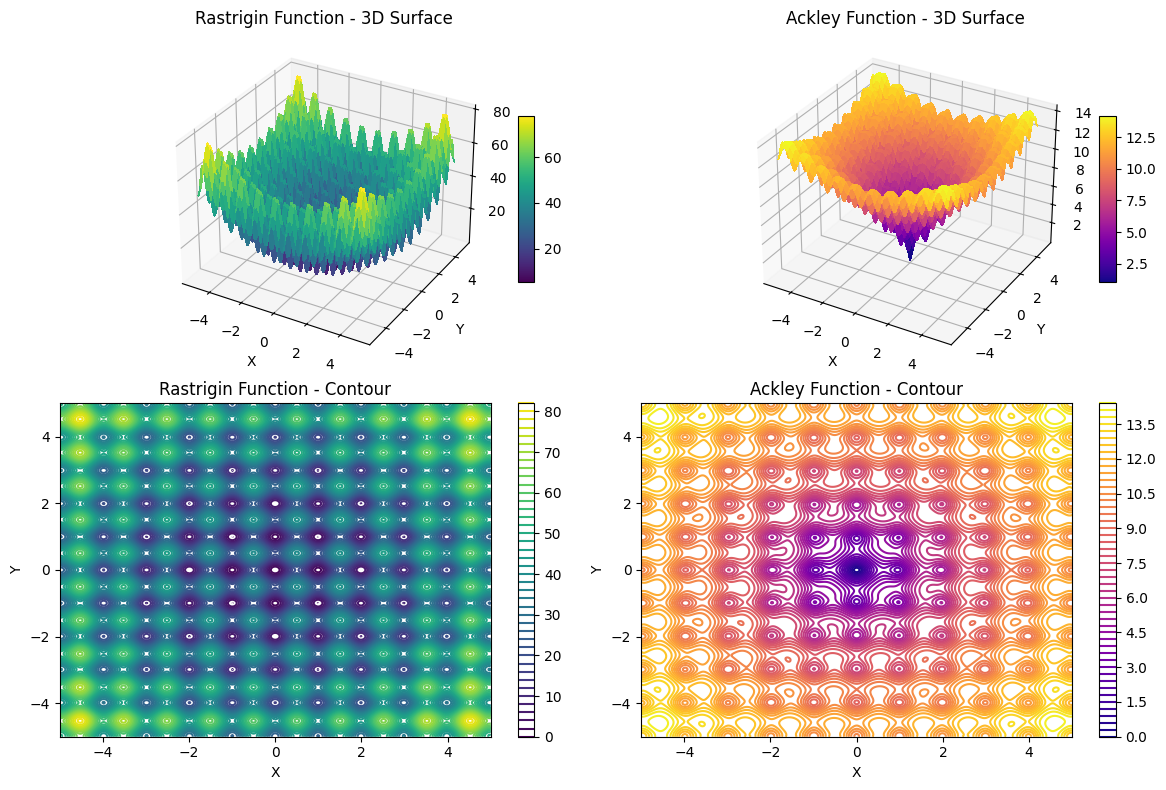

In [96]:
# Grid of points
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
grid_points = np.stack([X.ravel(), Y.ravel()], axis=1)

# Evaluate functions
rastrigin_values = np.array([rastrigin_f(point) for point in grid_points]).reshape(X.shape)
ackley_values = np.array([ackley_f(point) for point in grid_points]).reshape(X.shape)

# Create 2x2 plot
fig = plt.figure(figsize=(12, 8))

# 1. Rastrigin - 3D Surface Plot
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
surf1 = ax1.plot_surface(X, Y, rastrigin_values, cmap='viridis', linewidth=0, antialiased=False)
ax1.set_title('Rastrigin Function - 3D Surface')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(X, Y)')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)

# 2. Ackley - 3D Surface Plot
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
surf2 = ax2.plot_surface(X, Y, ackley_values, cmap='plasma', linewidth=0, antialiased=False)
ax2.set_title('Ackley Function - 3D Surface')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('f(X, Y)')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)

# 3. Rastrigin - Contour Plot
ax3 = fig.add_subplot(2, 2, 3)
contour1 = ax3.contour(X, Y, rastrigin_values, levels=50, cmap='viridis')
ax3.set_title('Rastrigin Function - Contour')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
fig.colorbar(contour1, ax=ax3)

# 4. Ackley - Contour Plot
ax4 = fig.add_subplot(2, 2, 4)
contour2 = ax4.contour(X, Y, ackley_values, levels=50, cmap='plasma')
ax4.set_title('Ackley Function - Contour')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
fig.colorbar(contour2, ax=ax4)

plt.tight_layout()
plt.show()

#### Ackley & Rastrigin Function in 2D

In [176]:
# Comparing Gradient Descent to another optimisation algorithm
initial_guess = [-4,0]

# Optimisation algorithm from scipy
res = minimize(rastrigin_f, initial_guess, method='Powell',  options={'maxfev': 100} )

# Optimisation using Gradient Descent
xf, x_list, f_list = gradient_descent(rastrigin_f, np.array(initial_guess).reshape(1, -1), central_finite_diff5, 0.01, max_iter=100,  traj=True)
print(f"\nFinal Result Comparison:\n========= scipy alg: {res.fun} \n========= gradient descent: {f_list[-1]}")


Final Result Comparison:
========= scipy alg: 0.9949590570946825 
========= gradient descent: 19.839951596922557


In [175]:
# Comparing Gradient Descent to another optimisation algorithm
initial_guess = [-4,3]

# Optimisation algorithm from scipy
res = minimize(ackley_f, initial_guess, method='Powell',  options={'maxfev': 100} )

# Optimisation using Gradient Descent
xf, x_list, f_list = gradient_descent(ackley_f, np.array(initial_guess).reshape(1, -1), central_finite_diff5, 0.01, max_iter=100,  traj=True)
print(f"\nFinal Result Comparison:\n========= scipy alg: {res.fun} \n========= gradient descent: {f_list[-1]}")


Final Result Comparison:
========= scipy alg: 0.0005814972226443338 
========= gradient descent: 9.474582179891883
